In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from keras.layers import Dense, InputLayer,  Conv2D, MaxPooling2D, Flatten, Dropout
from keras.models import load_model
from keras.layers import Dense, InputLayer
from sklearn.model_selection import train_test_split
from keras import metrics

In [3]:
df = pd.read_csv('middle.csv')
df

,Unnamed: 0,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,preschool_km,theater_km,green_part_500,green_part_3000,leisure_count_5000,sport_count_5000,market_count_5000,prom_part_5000,cafe_count_1500,price_doc
0,0,2011-08-20,43,27.0,4.0,5.0,panel,2006.0,2.0,8.0,...,0.177975,14.053047,0.00,11.98,0,52,4,13.31,34,5850000
1,1,2011-08-23,34,19.0,3.0,5.0,panel,1986.0,1.0,6.0,...,0.273345,6.829889,25.14,18.07,10,66,14,27.47,17,6000000
2,2,2011-08-27,43,29.0,2.0,5.0,panel,1985.0,2.0,8.0,...,0.158072,4.273200,1.67,12.14,4,67,10,21.58,14,5700000
3,3,2011-09-01,89,50.0,9.0,9.0,panel,1998.0,1.0,17.0,...,0.236455,16.990677,17.36,20.79,0,26,3,3.89,23,13100000
4,4,2011-09-05,77,77.0,4.0,5.0,panel,1990.0,2.0,15.0,...,0.376838,1.112486,3.56,5.06,91,195,14,10.92,272,16331452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,30466,2015-06-30,44,27.0,7.0,9.0,monolit,1975.0,2.0,6.0,...,0.349899,7.482165,3.38,13.14,2,84,6,17.24,28,7400000
30467,30467,2015-06-30,86,59.0,3.0,9.0,panel,1988.0,4.0,10.0,...,0.362681,0.778428,5.64,6.52,82,171,15,12.85,292,25000000
30468,30468,2015-06-30,45,29.0,10.0,20.0,monolit,2003.0,1.0,1.0,...,1.234235,13.459593,3.33,41.64,1,11,1,6.96,3,6970959
30469,30469,2015-06-30,64,32.0,5.0,15.0,monolit,2003.0,2.0,11.0,...,0.130667,2.088193,14.85,30.31,4,65,7,9.33,42,13500000


In [ ]:
df['preschool_quota'].mean()

In [5]:
nans = (df[df['preschool_quota'].isnull()]).index.tolist()

In [6]:
for i in nans:
  df['preschool_quota'][i]= 3271.0

<ipython-input-6-b4b54b8dc9cf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['preschool_quota'][i]= 3271.0


In [7]:
df['hospital_beds_raion'].mean()

1190.7386774797255

In [8]:
nans = (df[df['hospital_beds_raion'].isnull()]).index.tolist()

In [10]:
for i in nans:
  df['hospital_beds_raion'][i]= 1191.0

<ipython-input-10-f2758ffd2fb5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hospital_beds_raion'][i]= 1191.0


In [11]:
df['metro_km_walk'].mean()

3.561466753071865

In [12]:
nans = (df[df['metro_km_walk'].isnull()]).index.tolist()

In [13]:
for i in nans:
  df['metro_km_walk'][i]= 4.0

<ipython-input-13-aeaa897ab993>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['metro_km_walk'][i]= 4.0


In [14]:
df['prom_part_5000'].mean()

10.348668669329546

In [15]:
nans = (df[df['prom_part_5000'].isnull()]).index.tolist()

In [16]:
for i in nans:
  df['prom_part_5000'][i]= 10.0

<ipython-input-16-d8ad3a35aa7f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prom_part_5000'][i]= 10.0


In [17]:
df.loc[df['material'] == 'wood']

,Unnamed: 0,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,preschool_km,theater_km,green_part_500,green_part_3000,leisure_count_5000,sport_count_5000,market_count_5000,prom_part_5000,cafe_count_1500,price_doc
24715,24715,2014-11-13,61,45.0,8.0,1.0,wood,1988.0,2.0,10.0,...,3.905484,11.007334,25.6,28.12,0,4,1,10.65,0,6931143


In [18]:
df = df.drop(index=24715)

In [19]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')

encoder_df = pd.DataFrame(encoder. fit_transform(df[['material']]).toarray())

final_df = df.join(encoder_df)

print(final_df)

       Unnamed: 0   timestamp  full_sq  life_sq  floor  max_floor material  \
0               0  2011-08-20       43     27.0    4.0        5.0    panel   
1               1  2011-08-23       34     19.0    3.0        5.0    panel   
2               2  2011-08-27       43     29.0    2.0        5.0    panel   
3               3  2011-09-01       89     50.0    9.0        9.0    panel   
4               4  2011-09-05       77     77.0    4.0        5.0    panel   
...           ...         ...      ...      ...    ...        ...      ...   
30466       30466  2015-06-30       44     27.0    7.0        9.0  monolit   
30467       30467  2015-06-30       86     59.0    3.0        9.0    panel   
30468       30468  2015-06-30       45     29.0   10.0       20.0  monolit   
30469       30469  2015-06-30       64     32.0    5.0       15.0  monolit   
30470       30470  2015-06-30       43     28.0    1.0        9.0  monolit   

       build_year  num_room  kitch_sq  ...  sport_count_5000  \

In [21]:
!pip install category_encoders
from category_encoders.binary import BinaryEncoder

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.4 MB/s eta 0:00:00


In [22]:
import category_encoders as ce
encoder = ce.BinaryEncoder(cols=['sub_area'], return_df=True)
final_df = encoder.fit_transform(final_df)

In [23]:
dict1={'yes':1, 'no':0}
final_df['incineration_raion'] = final_df['incineration_raion'].map(dict1)
final_df['oil_chemistry_raion'] = final_df['oil_chemistry_raion'].map(dict1)
final_df['radiation_raion'] = final_df['radiation_raion'].map(dict1)
final_df['big_market_raion'] = final_df['big_market_raion'].map(dict1)

In [24]:
final_df.head(50)

,Unnamed: 0,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,sport_count_5000,market_count_5000,prom_part_5000,cafe_count_1500,price_doc,0,1,2,3,4
0,0,2011-08-20,43,27.0,4.0,5.0,panel,2006.0,2.0,8.0,...,52,4,13.31,34,5850000,0.0,0.0,0.0,0.0,1.0
1,1,2011-08-23,34,19.0,3.0,5.0,panel,1986.0,1.0,6.0,...,66,14,27.47,17,6000000,0.0,0.0,0.0,0.0,1.0
2,2,2011-08-27,43,29.0,2.0,5.0,panel,1985.0,2.0,8.0,...,67,10,21.58,14,5700000,0.0,0.0,0.0,0.0,1.0
3,3,2011-09-01,89,50.0,9.0,9.0,panel,1998.0,1.0,17.0,...,26,3,3.89,23,13100000,0.0,0.0,0.0,0.0,1.0
4,4,2011-09-05,77,77.0,4.0,5.0,panel,1990.0,2.0,15.0,...,195,14,10.92,272,16331452,0.0,0.0,0.0,0.0,1.0
5,5,2011-09-06,67,46.0,14.0,16.0,panel,1989.0,1.0,13.0,...,113,17,25.79,14,9100000,0.0,0.0,0.0,0.0,1.0
6,6,2011-09-08,25,14.0,10.0,16.0,panel,1990.0,2.0,5.0,...,127,8,12.76,44,5500000,0.0,0.0,0.0,0.0,1.0
7,7,2011-09-09,44,44.0,5.0,5.0,panel,1981.0,1.0,8.0,...,47,4,11.44,29,2000000,0.0,0.0,0.0,0.0,1.0
8,8,2011-09-10,42,27.0,5.0,5.0,panel,1985.0,2.0,8.0,...,85,11,14.52,15,5300000,0.0,0.0,0.0,0.0,1.0
9,9,2011-09-13,36,21.0,9.0,9.0,panel,2003.0,1.0,7.0,...,67,1,10.50,9,2000000,0.0,0.0,0.0,0.0,1.0


In [30]:
import sklearn.utils
df = sklearn.utils.shuffle(final_df)
df

,Unnamed: 0,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,sport_count_5000,market_count_5000,prom_part_5000,cafe_count_1500,price_doc,0,1,2,3,4
21709,21709,2014-08-20,37,21.0,8.0,15.0,panel,1975.0,1.0,7.0,...,203,13,5.73,643,3136270,0.0,0.0,0.0,0.0,1.0
21541,21541,2014-08-15,63,47.0,14.0,0.0,monolit,2000.0,2.0,0.0,...,5,1,7.81,0,6530200,0.0,0.0,1.0,0.0,0.0
2921,2921,2012-07-20,44,27.0,4.0,5.0,panel,1986.0,1.0,8.0,...,63,4,7.48,13,6800000,0.0,0.0,0.0,0.0,1.0
21623,21623,2014-08-18,33,17.0,4.0,5.0,monolit,2005.0,1.0,5.0,...,56,15,19.69,13,4650000,0.0,0.0,1.0,0.0,0.0
5585,5585,2012-12-30,57,41.0,17.0,20.0,panel,1981.0,1.0,11.0,...,8,0,4.56,1,5125395,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,392,2011-11-17,36,14.0,8.0,9.0,panel,1998.0,2.0,7.0,...,49,8,11.04,28,5500000,0.0,0.0,0.0,0.0,1.0
23379,23379,2014-10-08,69,48.0,2.0,4.0,panel,2011.0,3.0,7.0,...,87,17,24.26,7,9100000,0.0,0.0,0.0,0.0,1.0
22318,22318,2014-09-08,86,47.0,14.0,20.0,monolit,2014.0,3.0,10.0,...,49,5,13.97,21,13038850,0.0,0.0,1.0,0.0,0.0
19000,19000,2014-05-28,51,35.0,2.0,3.0,monolit,2015.0,2.0,10.0,...,0,0,10.00,0,2518800,0.0,0.0,1.0,0.0,0.0


In [48]:
df.to_csv('dataset.csv')

In [31]:
x = df.drop(['price_doc', 'material', 'Unnamed: 0', 'timestamp'], axis=1)
y = df[['price_doc']]

In [32]:
x

,full_sq,life_sq,floor,max_floor,build_year,num_room,kitch_sq,state,sub_area_0,sub_area_1,...,leisure_count_5000,sport_count_5000,market_count_5000,prom_part_5000,cafe_count_1500,0,1,2,3,4
21709,37,21.0,8.0,15.0,1975.0,1.0,7.0,1.0,0,1,...,105,203,13,5.73,643,0.0,0.0,0.0,0.0,1.0
21541,63,47.0,14.0,0.0,2000.0,2.0,0.0,2.0,0,1,...,0,5,1,7.81,0,0.0,0.0,1.0,0.0,0.0
2921,44,27.0,4.0,5.0,1986.0,1.0,8.0,3.0,0,0,...,1,63,4,7.48,13,0.0,0.0,0.0,0.0,1.0
21623,33,17.0,4.0,5.0,2005.0,1.0,5.0,2.0,0,0,...,9,56,15,19.69,13,0.0,0.0,1.0,0.0,0.0
5585,57,41.0,17.0,20.0,1981.0,1.0,11.0,3.0,0,1,...,0,8,0,4.56,1,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,36,14.0,8.0,9.0,1998.0,2.0,7.0,2.0,0,0,...,2,49,8,11.04,28,0.0,0.0,0.0,0.0,1.0
23379,69,48.0,2.0,4.0,2011.0,3.0,7.0,2.0,0,0,...,5,87,17,24.26,7,0.0,0.0,0.0,0.0,1.0
22318,86,47.0,14.0,20.0,2014.0,3.0,10.0,1.0,0,1,...,1,49,5,13.97,21,0.0,0.0,1.0,0.0,0.0
19000,51,35.0,2.0,3.0,2015.0,2.0,10.0,2.0,1,0,...,0,0,0,10.00,0,0.0,0.0,1.0,0.0,0.0


In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [34]:
mean = x_train.mean(axis = 0)
x_train -= mean
s = x_train.std(axis = 0)
x_train /= s

x_test -= mean
x_test /= s
x_train

,full_sq,life_sq,floor,max_floor,build_year,num_room,kitch_sq,state,sub_area_0,sub_area_1,...,leisure_count_5000,sport_count_5000,market_count_5000,prom_part_5000,cafe_count_1500,0,1,2,3,4
18311,0.025061,-0.182663,-0.310505,0.806473,0.635923,0.30444,0.396035,1.021067,-0.354927,1.081039,...,0.054984,0.552588,1.836362,1.511948,-0.213307,-0.164051,-0.215505,1.073244,-0.230514,-0.840932
22435,-0.893072,-0.858880,0.847662,0.806473,0.472895,-1.03266,-1.354508,-0.375052,-0.354927,1.081039,...,-0.424345,-0.969425,-1.228546,-1.029839,-0.325368,-0.164051,-0.215505,1.073244,-0.230514,-0.840932
7631,0.229091,0.380851,0.654634,0.651631,0.391381,-1.03266,0.833671,1.021067,-0.354927,1.081039,...,-0.424345,-1.012298,-1.024218,-0.677653,-0.335555,-0.164051,-0.215505,-0.931709,-0.230514,1.189099
19229,1.249240,0.437202,1.040690,-1.671011,-1.075867,1.64154,1.052489,-1.771171,-0.354927,1.081039,...,-0.424345,-0.990862,-1.024218,-0.449977,-0.335555,-0.164051,-0.215505,1.073244,-0.230514,-0.840932
2046,-0.995087,-0.915231,-1.275644,-1.051640,-1.238895,0.30444,-0.260418,1.021067,-0.354927,1.081039,...,-0.232614,0.681209,-0.206910,0.677730,-0.111433,-0.164051,-0.215505,-0.931709,-0.230514,1.189099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23426,1.555284,2.747609,1.233718,0.806473,1.695602,1.64154,-1.354508,-1.771171,-0.354927,-0.924991,...,-0.280547,-0.776494,-0.819891,0.348667,-0.264244,-0.164051,-0.215505,1.073244,-0.230514,-0.840932
14731,-0.638035,-0.802528,0.268579,0.341945,-0.179215,-1.03266,0.177217,-0.375052,-0.354927,-0.924991,...,-0.328480,0.080979,0.814726,0.375348,-0.029933,-0.164051,-0.215505,1.073244,-0.230514,-0.840932
5118,-1.301132,-1.084285,-0.889588,-1.051640,-1.238895,0.30444,-0.479236,1.021067,-0.354927,1.081039,...,1.157442,1.710176,2.040690,2.289248,0.173815,-0.164051,-0.215505,-0.931709,-0.230514,1.189099
20112,-0.995087,-0.971583,-1.275644,-1.825854,-0.586784,-1.03266,-1.573326,1.021067,2.817346,-0.924991,...,-0.424345,-1.140919,-1.228546,-0.062217,-0.335555,-0.164051,-0.215505,1.073244,-0.230514,-0.840932


In [42]:
def create_model():
    model = keras.Sequential()
    model.add(Dense(61, activation = 'sigmoid', input_shape = (x.shape[1],)))
    model.add(Dense(352, activation = 'sigmoid'))
    model.add(Dense(1))
    model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])
    return model

In [43]:
model = create_model()
history = model.fit(x_train, y_train, batch_size = 14, epochs = 100, validation_split=0.2,
                    verbose=2)

Epoch 1/100
1167/1167 - 3s - loss: 73658747846656.0000 - mae: 7119709.5000 - val_loss: nan - val_mae: nan - 3s/epoch - 3ms/step
Epoch 2/100
1167/1167 - 2s - loss: 73652674494464.0000 - mae: 7119280.5000 - val_loss: nan - val_mae: nan - 2s/epoch - 2ms/step
Epoch 3/100
1167/1167 - 2s - loss: 73646794080256.0000 - mae: 7118872.0000 - val_loss: nan - val_mae: nan - 2s/epoch - 2ms/step
Epoch 4/100
1167/1167 - 3s - loss: 73641031106560.0000 - mae: 7118465.0000 - val_loss: nan - val_mae: nan - 3s/epoch - 2ms/step
Epoch 5/100
1167/1167 - 3s - loss: 73635251355648.0000 - mae: 7118057.0000 - val_loss: nan - val_mae: nan - 3s/epoch - 3ms/step
Epoch 6/100
1167/1167 - 3s - loss: 73629496770560.0000 - mae: 7117654.0000 - val_loss: nan - val_mae: nan - 3s/epoch - 3ms/step
Epoch 7/100
1167/1167 - 3s - loss: 73623641522176.0000 - mae: 7117246.5000 - val_loss: nan - val_mae: nan - 3s/epoch - 2ms/step
Epoch 8/100
1167/1167 - 3s - loss: 73617912102912.0000 - mae: 7116841.5000 - val_loss: nan - val_mae: na

In [ ]:
# from keras import callbacks
# earlystopping = callbacks.EarlyStopping(monitor="mae",
#                                         mode="min",
#                                         patience=5,
#                                         restore_best_weights=True)

# history = model.fit(x_train, y_train,
#                     batch_size=128,
#                     epochs=100,
#                     validation_data=(x_test, y_test),
#                     callbacks=[earlystopping])


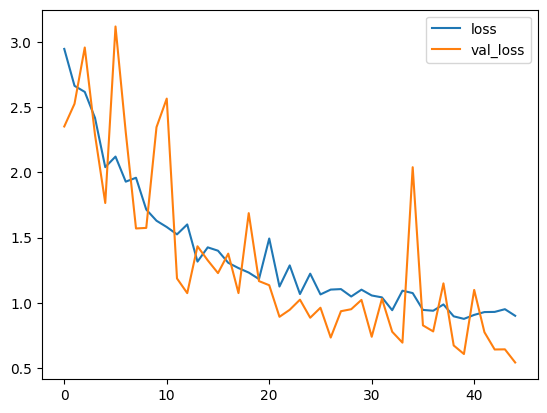

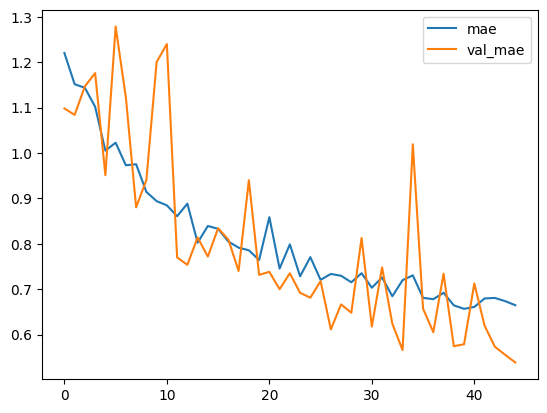

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# history_df = pd.DataFrame(history.history)
# history_df.loc[:, ['loss', 'val_loss']].plot()
# history_df.loc[:, ['mae', 'val_mae']].plot()
# plt.show()

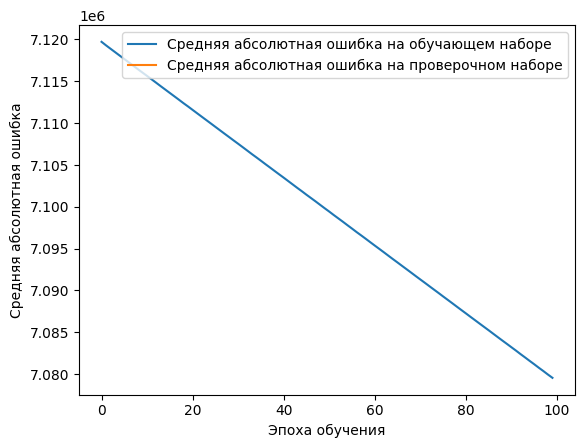

In [44]:
plt.plot(history.history['mae'],
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mae'],
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

In [ ]:
# y_pred=model.predict(x_test)
# pred = y_pred.tolist()
# pred

In [ ]:
# test = y_test.to_numpy()
# test = test.tolist()
# test

In [ ]:
# diff = []
# for i in range(len(pred)):
#   print("Сеть сказала: ", round(pred[i][0],2), ", а верный ответ: ", round(test[i][0],2), ", разница: ", round(pred[i][0] - test[i][0],2))
#   a = round(pred[i][0] - test[i][0],2)
#   diff.append(a)

In [45]:
model.evaluate(x_test, y_test)

315/315 [==============================] - 2s 5ms/step - loss: 73529613615104.0000 - mae: 7102561.0000


[73529613615104.0, 7102561.0]

In [46]:
def create_model():
    model = keras.Sequential()
    model.add(Dense(61, activation = 'sigmoid', input_shape = (x.shape[1],)))
    model.add(Dense(896, activation = 'sigmoid'))
    model.add(Dense(352, activation = 'sigmoid'))
    model.add(Dropout(0.3))
    model.add(Dense(1))
    model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])
    return model

In [47]:
model = create_model()
history = model.fit(x_train, y_train, batch_size = 16, epochs = 100, validation_split=0.2,
                    verbose=2)

Epoch 1/100
1021/1021 - 11s - loss: 73660341682176.0000 - mae: 7119821.5000 - val_loss: nan - val_mae: nan - 11s/epoch - 11ms/step
Epoch 2/100
1021/1021 - 9s - loss: 73657464389632.0000 - mae: 7119619.0000 - val_loss: nan - val_mae: nan - 9s/epoch - 9ms/step
Epoch 3/100
1021/1021 - 10s - loss: 73654561931264.0000 - mae: 7119421.5000 - val_loss: nan - val_mae: nan - 10s/epoch - 9ms/step
Epoch 4/100
1021/1021 - 9s - loss: 73651709804544.0000 - mae: 7119225.0000 - val_loss: nan - val_mae: nan - 9s/epoch - 9ms/step
Epoch 5/100
1021/1021 - 9s - loss: 73648958341120.0000 - mae: 7119017.5000 - val_loss: nan - val_mae: nan - 9s/epoch - 9ms/step
Epoch 6/100
1021/1021 - 10s - loss: 73646072659968.0000 - mae: 7118821.5000 - val_loss: nan - val_mae: nan - 10s/epoch - 10ms/step
Epoch 7/100
1021/1021 - 9s - loss: 73643203756032.0000 - mae: 7118618.5000 - val_loss: nan - val_mae: nan - 9s/epoch - 9ms/step
Epoch 8/100
1021/1021 - 9s - loss: 73640385183744.0000 - mae: 7118418.5000 - val_loss: nan - val

In [49]:
model.save('/content/whatprice.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
